In [1]:
import os
import re
import json
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

In [2]:
labels_path = '../labels.json'

In [3]:
def load_to_process():
    labels = {}
    with open(labels_path) as json_file:
        labels = json.load(json_file)
        
    to_proc = []
    for path, folder_list, file_list in os.walk('../cache/SisFall_dataset/SisFall_dataset'):
        for file in file_list:

            if file in labels:
                continue

            file_path = os.path.join(path, file)
            
            match = re.search(r"([A-Z 0-9]{3,4})_([A-Z 0-9]{3,4})_([A-Z 0-9]{3})", file)

            if match:
                activity = match.group(1)

                if 'D' in activity:
                    labels[file] = None
                    continue

                to_proc.append({'path': file_path, 'name': file })
                
    return to_proc, labels

In [4]:
def save_labels():
    with open(labels_path, 'w') as fp:
        json.dump(labels, fp)

# Process data

In [5]:
import pandas as pd

In [204]:
files_to_process, labels = load_to_process()
print(f'To process {len(files_to_process)}')

current_file = {'name':''}

for f in files_to_process:
    if f['name'] > current_file['name']:
        current_file = f
        
print(current_file)

data = pd.read_csv(current_file['path'], header=None)
data = data.iloc[:,:3]

To process 1552
{'path': '../cache/SisFall_dataset/SisFall_dataset/SE06/F13_SE06_R01.txt', 'name': 'F13_SE06_R01.txt'}


In [209]:
begin, end = 800, 1400

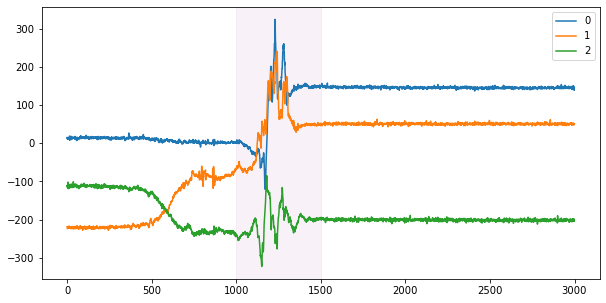

In [208]:
data.plot()
plt.axvspan(begin, end, color='purple', alpha=0.05)
plt.show()

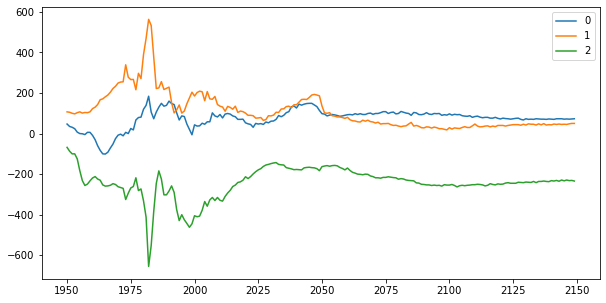

In [202]:
data[begin:end].plot()
plt.show()

In [203]:
labels[current_file['name']] = {
    'begin': begin,
    'end': end
}
save_labels()